In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel('1_Mobiles.xlsx')
df=df.drop('Unnamed: 0',axis=1)
df.head(10)

,Cleaned Detailed Review,Trust
0,nice phone worth money price point else ask th...,1
1,smartphone impressed camera battery backup goo...,1
2,usual value money device one thing attracts st...,1
3,best mobile price range battery backup highlig...,1
4,quality wise good good performance prize cam q...,1
5,first would like thank flippant fastest delive...,1
6,smartphone good camera battery value money sas...,1
7,nice product fully satisfied thankyou flippant...,1
8,using phone three day speed good display cool ...,1
9,super 48 camera like,1


In [ ]:
# Remove NULL reviews
df = df[df['Cleaned Detailed Review'].notna()]

In [ ]:
# Balacing Data to make sure equal number of 0's and 1's 
df_high = df[df['Trust']==1]
df_low = df[df['Trust']==0]
df_high_new = df_high.sample(df_low.shape[0])
df= pd.concat([df_high_new, df_low])

In [ ]:
df['Trust'].value_counts()

1    461
0    461
Name: Trust, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Cleaned Detailed Review'],df['Trust'],  stratify=df['Trust'],test_size=0.3)

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']


In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)


In [ ]:

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
21/21 [==============================] - 290s 13s/step - loss: 0.7276 - accuracy: 0.4636 - precision: 0.4663 - recall: 0.4923
Epoch 2/10
21/21 [==============================] - 279s 13s/step - loss: 0.6990 - accuracy: 0.5318 - precision: 0.5405 - recall: 0.4334
Epoch 3/10
21/21 [==============================] - 279s 13s/step - loss: 0.6753 - accuracy: 0.5829 - precision: 0.5957 - recall: 0.5201
Epoch 4/10
21/21 [==============================] - 279s 13s/step - loss: 0.6718 - accuracy: 0.5814 - precision: 0.5847 - recall: 0.5666
Epoch 5/10
21/21 [==============================] - 279s 13s/step - loss: 0.6710 - accuracy: 0.5938 - precision: 0.5831 - recall: 0.6625
Epoch 6/10
21/21 [==============================] - 278s 13s/step - loss: 0.6633 - accuracy: 0.6016 - precision: 0.6006 - recall: 0.6099
Epoch 7/10
21/21 [==============================] - 278s 13s/step - loss: 0.6519 - accuracy: 0.6202 - precision: 0.6219 - recall: 0.6161
Epoch 8/10
21/21 [=======================

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[112,  27],
       [ 75,  63]])

Text(33.0, 0.5, 'Truth')

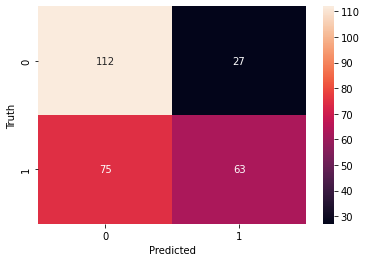

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.60      0.81      0.69       139
           1       0.70      0.46      0.55       138

    accuracy                           0.63       277
   macro avg       0.65      0.63      0.62       277
weighted avg       0.65      0.63      0.62       277

